In [14]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Datasets MLOPS/Datasets/02_medical_records.csv')
data

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.columns

Index(['age', 'gender', 'chest_pain', 'resting_BP', 'cholesterol',
       'fasting_BS', 'resting_ECG', 'max_HR', 'exercise_angina', 'old_peak',
       'ST_slope', 'cv_issue'],
      dtype='object')

# Exploratory Data Analysis 

In [2]:
data['cv_issue'].value_counts()

1    508
0    410
Name: cv_issue, dtype: int64

In [3]:
data.describe()

,age,resting_BP,cholesterol,fasting_BS,max_HR,old_peak,cv_issue
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='age', ylabel='Count'>

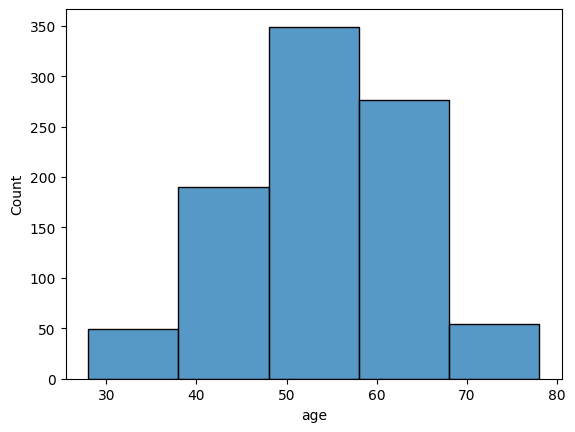

In [11]:
sns.histplot(data, x="age", binwidth=10) 

<Axes: >

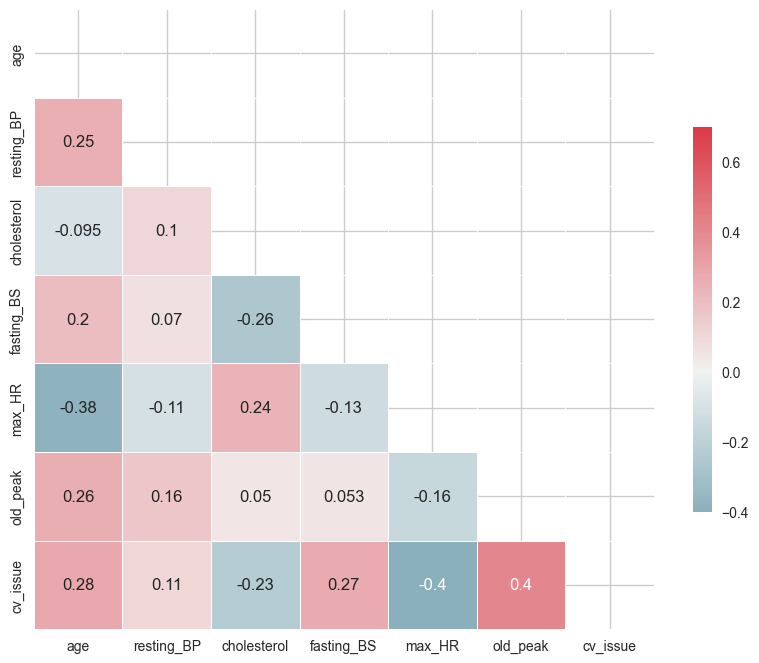

In [35]:
import numpy as np
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

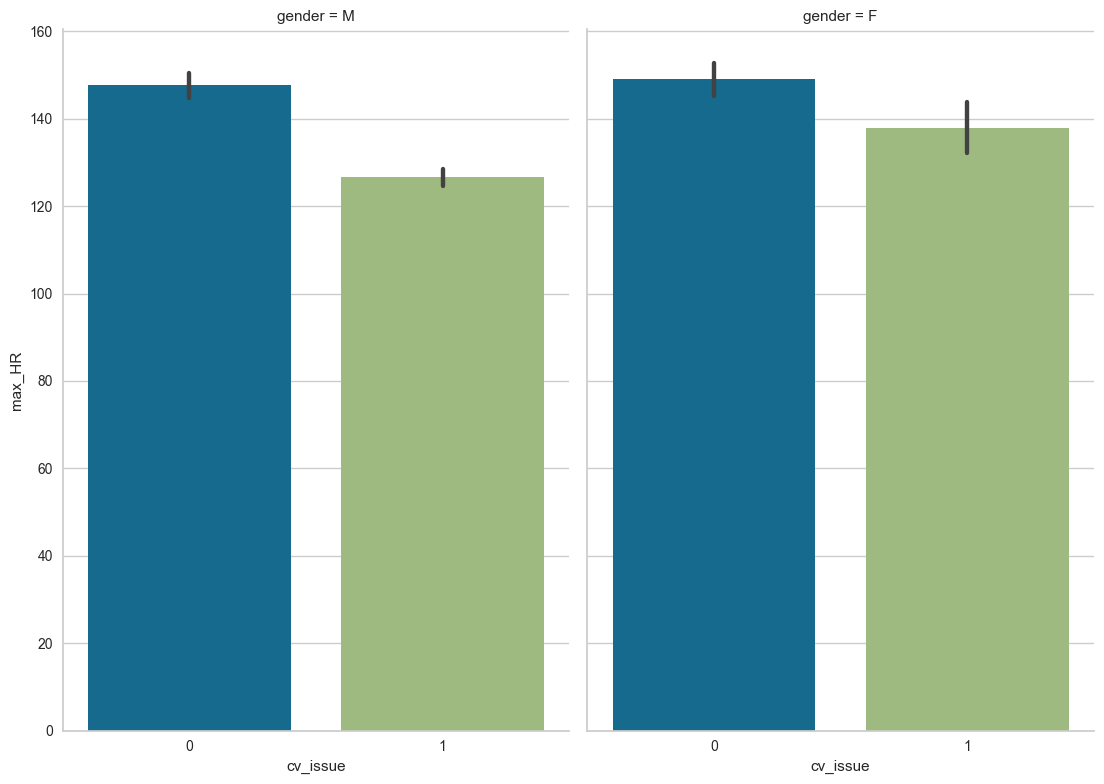

In [36]:
sns.catplot(
 data=data, x="cv_issue", y="max_HR", col="gender",
 kind="bar", height=8, aspect=.7,
)

# Train, Validate and Develop a Machine Learning pipeline using PyCaret

1. The "target" is the predicting variable of 'cv_issue' 
2. The categorical features are passed with 'gender', 'chest_pain', 'exercise_angina', 'ST_slope' 
3. The ordinal features of resting_ECG has the level of intensity of resting electrocardiogram results in increasing level from 'Normal', 'LVH' to 'ST' 
4. "remove_outliers" is set to true to drop outliers from the training data using an Isolation Forest
5. "normalize" is set to true in order to rescale the values of numeric columns in the dataset without affecting the ranges of values or information loss.
6. "transformation" is set to true to ensure that this parameter stabilizes the variance and minimize skewness for the data
7. "remove_multicollinearity" and "multicollinearity_threshold" are use to remove any multicorrelated columns with more than 0.7 score.
8. "bin_numeric_features" is use to turn continuous variables into categorical values using pre-defined number of bins

In [ ]:
# fix_imbalance = True, 

In [13]:
from pycaret.classification  import *

In [111]:
from pycaret.classification  import *
s = setup(data, 
          target='cv_issue',  
          session_id=123,     
          categorical_features=['gender', 'chest_pain', 'exercise_angina', 'ST_slope'],
          ordinal_features = {'resting_ECG' : ['Normal', 'LVH', 'ST']},
          remove_outliers=True,  
          normalize=True,      
          transformation=True,  
          remove_multicollinearity = True, multicollinearity_threshold = 0.7,
          bin_numeric_features = ['age'],
          log_experiment = True,
          experiment_name = 'cardio'
          )

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(885, 17)"
5,Transformed train set shape,"(609, 17)"
6,Transformed test set shape,"(276, 17)"
7,Ordinal features,3
8,Numeric features,6
9,Categorical features,4


2023/08/16 21:34:23 INFO mlflow.tracking.fluent: Experiment with name 'cardio' does not exist. Creating a new experiment.


In [112]:
s.dataset_transformed

,age,gender,chest_pain_ATA,chest_pain_ASY,chest_pain_NAP,chest_pain_TA,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope_Up,ST_slope_Down,ST_slope_Flat,cv_issue
0,-1.847603,0.503077,2.018663,-1.113091,-0.538752,-0.15891,0.542292,0.789420,-0.523506,-0.794361,1.415427,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
462,0.916737,0.503077,-0.495377,0.898400,-0.538752,-0.15891,-0.536062,0.375671,-0.523506,-0.794361,-0.837001,1.174268,0.572917,-0.877695,4.112392,-1.018229,1
853,-0.914571,0.503077,-0.495377,-1.113091,1.856140,-0.15891,0.431487,0.555681,-0.523506,1.045321,0.741457,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
540,0.916737,0.503077,-0.495377,-1.113091,1.856140,-0.15891,0.431487,0.151944,-0.523506,1.455334,-0.640221,1.174268,0.483732,-0.877695,-0.243168,0.982098,1
162,-0.914571,0.503077,2.018663,-1.113091,-0.538752,-0.15891,1.549450,0.600027,-0.523506,-0.794361,1.500652,-0.851594,-0.829785,1.139348,-0.243168,-1.018229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.005304,0.503077,-0.495377,0.898400,-0.538752,-0.15891,1.994332,1.476002,-0.523506,1.455334,-0.640221,1.174268,1.145730,-0.877695,-0.243168,0.982098,1
486,0.005304,0.503077,2.018663,-1.113091,-0.538752,-0.15891,-1.375211,0.229921,1.910198,1.455334,1.757587,-0.851594,-0.326789,1.139348,-0.243168,-1.018229,0
859,0.005304,-1.987767,-0.495377,-1.113091,1.856140,-0.15891,0.542292,0.925177,-0.523506,1.045321,0.163768,-0.851594,0.745203,1.139348,-0.243168,-1.018229,0
334,0.005304,0.503077,-0.495377,0.898400,-0.538752,-0.15891,-0.033216,-1.942789,1.910198,-0.794361,1.330414,-0.851594,-1.964589,1.139348,-0.243168,-1.018229,1


In [113]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8817,0.9263,0.9043,0.8873,0.8945,0.7598,0.7624,2.4360
lr,Logistic Regression,0.8660,0.9250,0.8957,0.8695,0.8812,0.7277,0.7308,2.4580
rf,Random Forest Classifier,0.8660,0.9133,0.8870,0.8756,0.8797,0.7284,0.7318,2.0670
gbc,Gradient Boosting Classifier,0.8613,0.9152,0.8871,0.8692,0.8764,0.7185,0.7221,2.0360
ridge,Ridge Classifier,0.8598,0.0000,0.9013,0.8561,0.8769,0.7144,0.7183,1.7990
lda,Linear Discriminant Analysis,0.8598,0.9247,0.9013,0.8561,0.8769,0.7144,0.7183,1.9710
lightgbm,Light Gradient Boosting Machine,0.8520,0.9070,0.8732,0.8634,0.8671,0.7002,0.7028,2.2710
ada,Ada Boost Classifier,0.8474,0.8928,0.8762,0.8546,0.8643,0.6901,0.6925,2.0640
et,Extra Trees Classifier,0.8457,0.9125,0.8673,0.8574,0.8616,0.6874,0.6889,2.1790
nb,Naive Bayes,0.8443,0.8986,0.8621,0.8602,0.8596,0.6847,0.6874,2.2620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

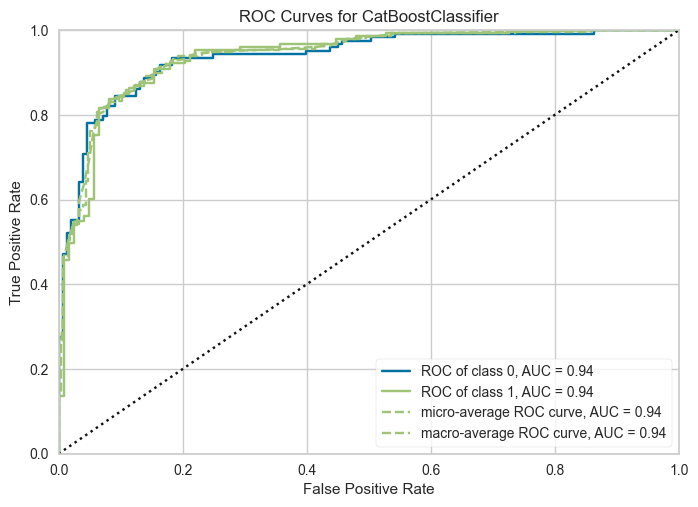

In [114]:
plot_model(best)

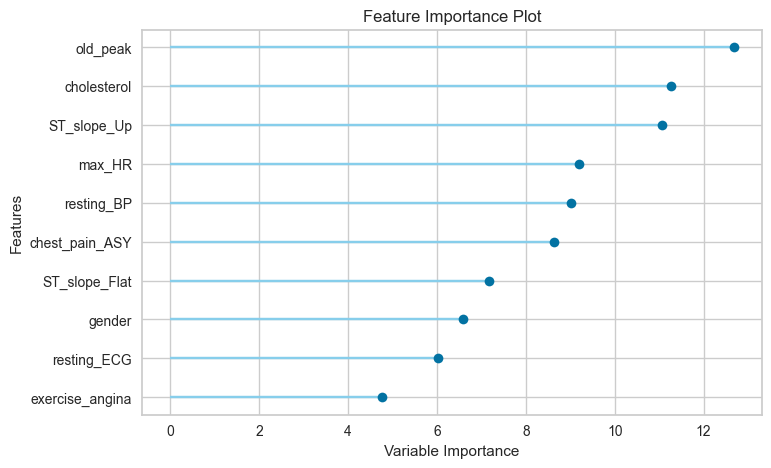

In [116]:
plot_model(best, plot = 'feature')

In [115]:
save_model(best, 'model_classifier_cardio')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\yapdo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ver...
                 ('transformation',
                  Tran

In [13]:
model = load_model('model_classifier_cardio')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\yapdo\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['gender', 'chest_pain',
                                             'exercise_angina', 'ST_slope'],
                                    transformer=Simp...
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000001AD0E5405B0>)])

In [18]:
# create a copy of data and drop Price
data2 = data.copy()
data2.drop('cv_issue', axis=1, inplace=True)


# generate predictions
from pycaret.classification import predict_model
predictions = predict_model(model, data=data2)
predictions.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,prediction_label,prediction_score
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.9857
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,0,0.8587
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.9548
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.8541
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.9758


In [32]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score 
# mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

def eval_metrics(actual, pred):
    acc = np.sqrt(accuracy_score(actual, pred))
    pre = precision_score(actual, pred)
    rec = recall_score(actual, pred)
    return acc, pre, rec  

In [34]:
if __name__ == "__main__":
    
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
        "Datasets MLOPS/Datasets/02_medical_records.csv"
    )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["cv_issue"], axis=1)
    test_x = test.drop(["cv_issue"], axis=1)
    train_y = train[["cv_issue"]]
    test_y = test[["cv_issue"]]

    alpha = 0.5
    l1_ratio = 0.5
    
    with mlflow.start_run():
        
        lr = model
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)
        (acc, pre, rec) = eval_metrics(test_y, predicted_qualities)

        print("Catboost model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  Accuracy: %s" % acc)
        print("  Precision: %s" % pre)
        print("  Recall: %s" % rec)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", pre)
        mlflow.log_metric("Recall", rec)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="catboostmodel_cardio")
        else:
            mlflow.sklearn.log_model(lr, "model")
        print(mlflow.get_artifact_uri())

Catboost model (alpha=0.500000, l1_ratio=0.500000):
  Accuracy: 0.9278305692406299
  Precision: 0.9076923076923077
  Recall: 0.855072463768116
file:///C:/Users/yapdo/Downloads/mlruns/0/a694f090ae0142c5b4d2b9f60f077804/artifacts


In [ ]:
# cd Downloads/Application MLops